# Coding how weight changes affect accuracy

A continuación vamos a ver como podemos hacer que los pesos de nuestra red se vayan actualizando de forma que impacten en la precisión de nuestro modelo.

In [6]:
import numpy as np 

#Nos definimos la función de activación de ReLU
def relu(input):
    output = max(0, input)
    return(output)

#Generamos la función que nos permite predecir valores para el caso de una sola capa oculta
def predict_with_network(input_data_row, weights):
    
    #Calculamos los resultados para el nodo 0
    node_0_input = (weights["node_0"] * input_data_row).sum()
    node_0_output = relu(node_0_input)
    
    #Calculamos los resultados para el nodo 1
    node_1_input = (weights["node_1"] * input_data_row).sum()
    node_1_output = relu(node_1_input)
    
    #Unimos los resultados
    hidden_layer_output = np.array([node_0_output, node_1_output])
    
    #Retornamos el valor predicho
    return((weights["output"] * hidden_layer_output).sum())


#Nos generamos los datos de entrada
input_data = np.array([0, 3])

#Nos generamos los pesos de la red iniciales
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

#Fijamos el target actual
target_actual = 3

#Obtenemos las predicciones para los pesos inciales
predicted_value_0 = predict_with_network(input_data,weights_0)

#Calculamos el error
error_0 = predicted_value_0 - target_actual

#Modificamos los pesos para obtener la predicción perfecta 
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

#Obtenemos la salida con los nuevos pesos
predicted_value_1 = predict_with_network(input_data, weights_1)

#Vemos el error
error_1 = predicted_value_1 - target_actual

#Mostramos los errores
print((error_0, error_1))

(6, 0)


# Scaling up to multiple data points

Ahora que ya sabemos que en función de los pesos tenemos diferentes predicciones para una observación, vamos a continuación a calcular las predicciones para múltiples puntos para unos pesos determinados. Para obtener el error vamos a proceder a usar la función **mean_squared_error** de la librería **skelearn.metrics**.

In [9]:
from sklearn.metrics import mean_squared_error

#Nos generamos los datos de entrada 
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

#Nos generamos las targets actuales
target_actual = [1, 3, 5, 7] 

#Generamos el conjuntos de pesos que queremos evaluar
weights_0 = {"node_0": np.array([2, 1]), "node_1": np.array([1, 2]), "output": np.array([1, 1])}
weights_1 = {"node_0": np.array([2, 1]), "node_1": np.array([1., 1.5]), "output": np.array([1., 1.5])}

#Generamos los resultados para ambos conjuntos de pesos
model_output_weights_0 = [predict_with_network(value, weights_0) for value in input_data]
model_output_weights_1 = [predict_with_network(value, weights_1) for value in input_data]

#Calculamos el mse para ambos resultados
error_weights_0 = mean_squared_error(target_actual, model_output_weights_0)
error_weights_1 = mean_squared_error(target_actual, model_output_weights_1)

#Mostramos los resultados
print("Mean squared error weights_0 : %f", error_weights_0)
print("Mean squared error weights_1 : %f", error_weights_1)

Mean squared error weights_0 : %f 37.5
Mean squared error weights_1 : %f 49.890625


[1, 3, 5, 7]

# Calculating slopes

Vamos a proceder a practicar con el cálculo de las pendientes. La pendiente es ** 2\*x\*(y-xb)** o **2\*input_data\*error** . Donde x e b pueden ser múltiples valores (x es un vector para cada punto de entrada y b es un vector), en este caso nuestra salida será un vector. A continuación vamos a proceder a realizar el proceso teniendo en cuenta un único punto de entrada.

In [10]:
#Nos creamos nuestro array de pesos
weights = np.array([0, 2, 1])

#Nos creamos nuestros datos de entrada
input_data = np.array([1, 2, 3])

#Nos creamos la etiquete a predecir
target = 0

#Obtenemos nuestra predicción
preds = (weights * input_data).sum()

#Obtenemos el error, corresponde con y - xb
error = preds - target

#Obtenemos la pendiente 
slope = 2 * input_data * error

#Mostramos le resultado
print(slope)

[14 28 42]


# Improving model weights

Una vez tenemos las pendientes calculadas, podemos usarlas para mejorar nuestro modelo. Si añadimos las pendientes a nuestro modelo entonces nos moveremos en la dirección adecuada. Sin embargo, es posible que avancemos en demasiado en dicha dirección. Nuestro objetivo es avanzar dando pequeños pasos hacia la dirección adecuada (agregando un ratio de aprendizaje bajo) y ver que nuestro modelo mejora.

In [11]:
#Fijamos una tasa de aprendizaje pequeña 
learning_rate = 0.01

#Actualizamos los pesos
weights_updated = weights - learning_rate * slope

#Volvemos a realizar las predicciones
preds_updated = (weights_updated * input_data).sum()

#Calculamos el nuevo error
error_updated = preds_updated - target

#Mostramos los errores
print(error)
print(error_updated)

7
5.04


# Making multiple updates to weights

A continuación vamos a proceder a actualizar los pesos de forma múltiple hasta conseguir un resultado óptimo. En este caso vamos a crear una red que no tiene ningún tipo de capa oculta.

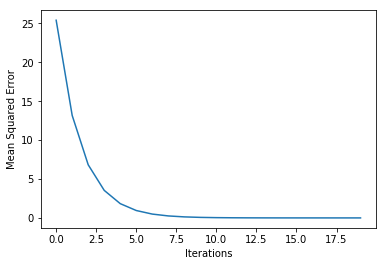

In [31]:
import matplotlib.pyplot as plt

def get_slope(input_data, target, weights):
    """Función que dado un conjunto de entrada nos permite obtener la pendiente para cada uno de los puntos del
    conjunto de entrada"""
    preds = (weights * input_data).sum()
    error = preds - target
    return 2 * input_data * error

def get_mse(input_data, target, weights):
    """Función que nos permite calcular el error cuadrático medio"""
    preds = (weights * input_data).sum()
    error = preds - target
    return(error ** 2)
        
#Fijamos el número de iteracioens, datos de entrada y pesos inciales
n_iter = 20
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])

mse_hist = []

for i in range(n_iter):
    slope = get_slope(input_data, target,  weights)
    weights = weights - 0.01 * slope
    mse = get_mse(input_data, target, weights)
    mse_hist.append(mse)

plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()